## Homework 2
### Due: Thursday Feb. 13

**Integer vs floating point number**

Write a program to calculate and print the factorial of a
number.  If you wish you can base your program on the
user-defined function for factorial given in Section 2.6, but write your
program so that it calculates the factorial using *integer*
variables, not floating-point ones.  Use your program to calculate the
factorial of 200.

Now modify your program to use floating-point variables instead and again
calculate the factorial of 200.  What do you find?  Explain.

(20 points)

In [32]:
# code
def factorial(n):
    nf = 1
    for i in range(1, n + 1):
        nf = nf * i
    return nf

# test 1
print('factorial 10 = ', factorial(10))

# test 2
print('factorial 200 = ', factorial(200))

factorial 10 =  3628800
factorial 200 =  788657867364790503552363213932185062295135977687173263294742533244359449963403342920304284011984623904177212138919638830257642790242637105061926624952829931113462857270763317237396988943922445621451664240254033291864131227428294853277524242407573903240321257405579568660226031904170324062351700858796178922222789623703897374720000000000000000000000000000000000000000000000000


In [37]:
def factorial2(n):
    if n == 0:
        return 1.0
    else:
        return float(n) * factorial2(n - 1)

# test 1
print(factorial2(10.0))

# test 2
print(factorial2(170.0))

# test 3
print(factorial2(200.0))

# For 200.0!, the resulting number exceeds the maximum value that can be represented by a floating-point number, 
# This results in an overflow and is represented by inf

3628800.0
7.257415615307994e+306
inf


**A Simple Derivative**

Suppose we have a function $f(x)$ and we want to
calculate its derivative at a point $x$.  We can do that with pencil and
paper if we know the mathematical form of the function, or we can do it on
the computer by making use of the definition of the derivative:

<p style="text-align:center;">
${d f\over d x} = \lim_{\delta\to0} {f(x+\delta)-f(x)\over\delta}.$
</p>

On the computer we can't actually take the limit as $\delta$ goes to
zero, but we can get a reasonable approximation just by making $\delta$
small.
- Write a program that defines a function *f(x)* returning the
  value $x(x-1)$, then calculates the derivative of the function at the
  point $x=1$ using the formula above with $\delta=10^{-2}$.  Calculate
  the true value of the same derivative analytically and compare with the
  answer your program gives.  The two will not agree perfectly.  Why not?
- Repeat the calculation for $\delta=10^{-4}$, $10^{-6}$, $10^{-8}$,
  $10^{-10}$, $10^{-12}$, and $10^{-14}$.  You should see that the accuracy
  of the calculation initially gets better as $\delta$ gets smaller, but
  then gets worse again.  Why is this?

(20 points)

In [2]:
# code
x     = 1 
delta = 0.01

def f(x):
    return x*(x - 1)
    
df = (f(x + delta) - f(x))/delta

print('Numerical derivative: ', df)
print('Analytical result:    ', 2 * x - 1)

print(' ')

print('The above two results are not equal because in the definition of numerical derivative,')
print('delta should tends to zero, whereas we are taking delta = 0.01')

print(' ')
delta = [10**(-4), 10**(-8), 10**(-12), 10**(-14)]
for i in delta:
    df = (f(x + i) - f(x))/i
    print(df)

print(' ')
print('The result degrades because when h is very small, f(x + h) - f(x) becomes very tiny,') 
print('and its representation is limited due to finite precision of numbers used by computers.')

Numerical derivative:  1.010000000000001
Analytical result:     1
 
The above two results are not equal because in the definition of numerical derivative,
delta should tends to zero, whereas we are taking delta = 0.01
 
1.0000999999998899
1.0000000039225287
1.0000889005833413
0.9992007221626509
 
The result degrades because when h is very small, f(x + h) - f(x) becomes very tiny,
and its representation is limited due to finite precision of numbers used by computers.


### Simpson's Rule

- Write a program to calculate an approximate value for the integral $\int_{0}^{2} ( x^4 - 2x + 1)dx$ from Example 5.1 in the book, but using Simpson's rule with 10 slices instead of the trapezoid rule. You may be able to modify your code from the trapezoid rule to complete this task. Compare your result to the known correct value of 4.4. What is the fractional error on your calculation?

- Copy your code and modify it to use one hundred slices, then one thousand. Note the improvement in the result and compare to the results from the trapezoid rule.

(30 points)

In [3]:
# code
import numpy as np

def simp13(f, a, b, n):
    ''' Input: f    = function
               a, b = lower and upper limit of integration
               n    = number of slices
        Output: I, integral value using Simpson-1/3 formula
    '''
    h = (b - a)/n
    
    s1 = 0.0
    for i in range(1, n, 2):
        x = a + i*h
        s1 = s1 + f(x)
        
    s2 = 0.0
    for i in range(2, n - 1, 2):
        x = a + i*h
        s2 = s2 + f(x)
        
    I = ( f(a) + 4*s1 + 2*s2 + f(b) ) * h/3
    return I

# define the function
def f(x):
    return x**4 - 2*x + 1

a = 0 
b = 2 

I1 = simp13(f, a, b, 10)
I2 = simp13(f, a, b, 100)
I3 = simp13(f, a, b, 1000)

print('For n = 10, integral value = %.8f' %(I2))

true_value = 4.4
obs_value  = I1

print('Percentage error = %.4f' %(np.abs(obs_value - true_value)/true_value * 100))

print(' ')
print('For n = 100,  integral value = %.8f' %(I2))
print('For n = 1000, integral value = %.8f' %(I3))

For n = 10, integral value = 4.40000004
Percentage error = 0.0097
 
For n = 100,  integral value = 4.40000004
For n = 1000, integral value = 4.40000000


### An Integral With No Analytic Solution

Consider the integral

$$ E(x) = \int_{0}^{x} \exp{-t^2} dt$$

- Write a program to calculate $E(x)$ for values of x from 0 to 3 in steps of 0.1. Choose for yourself what method you will use for performing the integral and a suitable number of slices.

- When you are convinced your program is working, extend it further to make a graph of E(x) as a function of x.

(30 points)

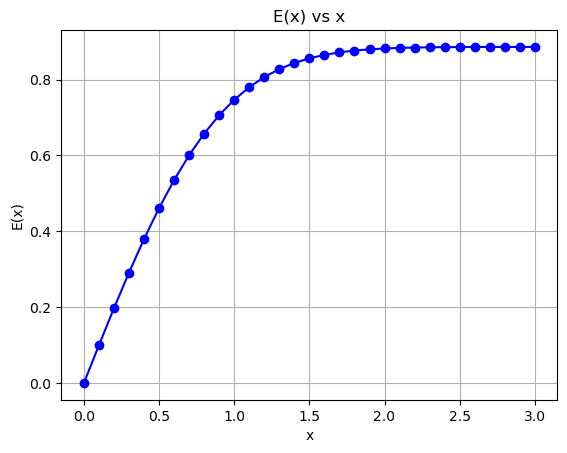

In [4]:
import numpy as np
import matplotlib.pyplot as plt

a = 0
x = np.arange(0, 3.1, 0.1)
n = 100

def f(t):
    return np.exp(-t**2)

# create a blank list to store the value of E(x) 
Evalue = []
for i in range(len(x)):
    # call the Simpson-1/3 function defined earlier
    E = simp13(f, a, x[i], n)
    Evalue.append(E)
    # print(f"{x[i+1]:.2f}, {E:.2f}")

plt.plot(x, Evalue, marker = 'o', linestyle = '-', color = 'b')
plt.xlabel('x')
plt.ylabel('E(x)')
plt.title('E(x) vs x')
plt.grid(True)
plt.show()